In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

## Exploring Categories

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

C:\Users\likhi\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


<Axes: ylabel='count'>

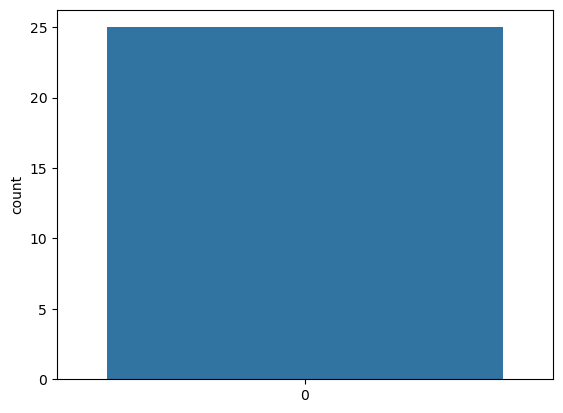

In [13]:
sns.countplot(df['Category'].value_counts())

Text(0.5, 1.0, 'Resume Category Distribution')

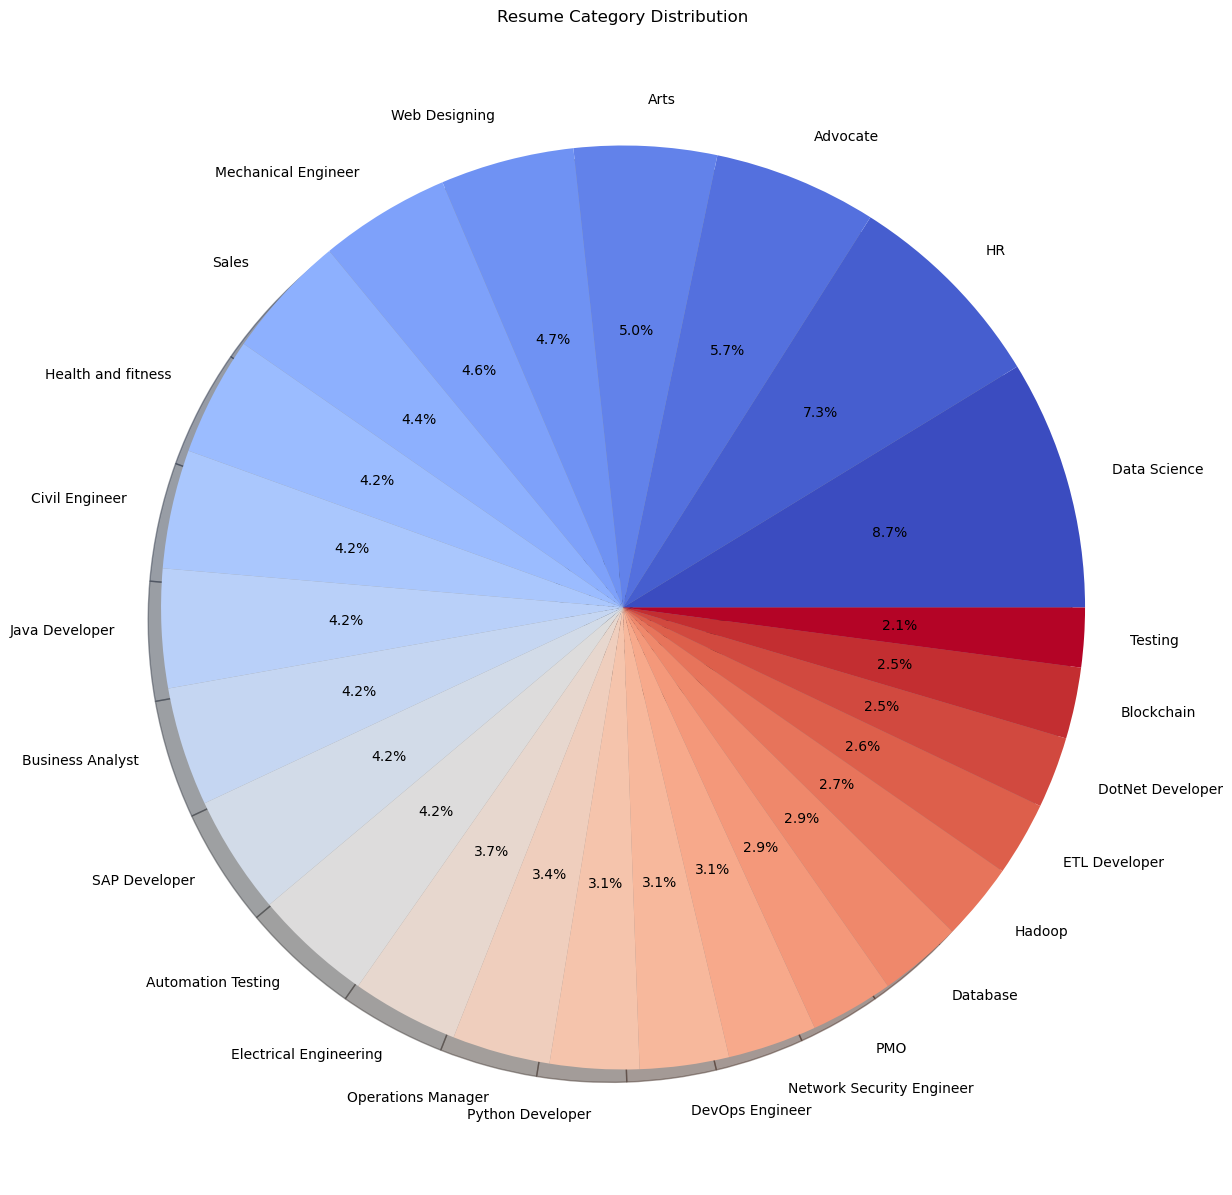

In [14]:
plt.figure(figsize=(15,15))
counts= df['Category'].value_counts()
labels= df['Category'].unique()

plt.pie(counts,labels=labels,autopct='%1.1f%%', shadow=True, colors= plt.cm.coolwarm(np.linspace(0,1,len(labels))) )
plt.title('Resume Category Distribution')

## Exploring Resume

In [15]:
df['Category'][0]

'Data Science'

In [16]:
print(df['Resume'][0])

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assur

In [17]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Cleaning text:
1. URLs
2. Hashtags
3. Mentions
4. special letters
5. Punctuations

In [18]:
import re

def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', ' ', cleanText)
    cleanText = re.sub('[%s]' % re.escape('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7F]', ' ', cleanText)
    cleanText = re.sub('[^a-zA-Z\s]', ' ', cleanText)  # Keep spaces for later whitespace normalization
    cleanText = re.sub('\s+', ' ', cleanText).strip()

    return cleanText

In [19]:
df['Resume']=df['Resume'].apply(lambda x: cleanResume(x))

In [20]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience months jQuery Exprience months Python Exprience monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the review proce

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [23]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing', 'Mechanical Engineer', 'Sales','Health and fitness', 'Civil Engineer', 'Java Developer', 'Business Analyst', 'SAP Developer', 'Automation Testing', 'Electrical Engineering', 'Operations Manager', 'Python Developer', 'DevOps Engineer', 'Network Security Engineer', 'PMO', 'Database', 'Hadoop', 'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']

## Vectorization

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(stop_words='english')

X= tfidf.fit_transform(df['Resume'])

## Splitting

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=0)

In [27]:
X_train.shape

(769, 7038)

In [28]:
X_test.shape

(193, 7038)

##Training the model

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [30]:
clf= OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [31]:
ypred= clf.predict(X_test)

In [32]:
print(accuracy_score(y_test,ypred))

0.9792746113989638


In [33]:
y_test

590    20
278    14
14      6
678    17
338    15
       ..
596    20
578    20
858     3
18      6
390    15
Name: Category, Length: 193, dtype: int32

In [34]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [35]:
myresume="""
K. Sai Likhitha
 sailikhitha.k21@iiits.in
 github.com/sailikhitha07
Education
 www.linkedin.com/sailikhitha
Indian Institute of Information Technology, Sri City
 B.Tech. ECE
 Coursework
 2021-25
 Current GPA: 8.9/10.0
 Courses: Object-Oriented Programming, Data Structures & Algorithms, Advanced Data Analytics, Python for Data
 Science, Embedded Systems, Pattern Recognition, Probability & Statistics, Machine Learning, Deep Learning
 Skills
 Languages: C,C++, Python, R, Matlab
 Tools: Excel , MySQL, Tableau, VS Code, Jupyter Notebook, R Studio, PowerBI
 Data Analysis: Pandas, NumPy, Matplotlib, Scikit-learn, Tensorflow
 Projects
 YouTube data scraping and analysis | Python, Pandas, BeautifulSoup
 • Scraped YouTube data to extract information about channels and videos using BeautifulSoup.
 • Analyzed channel statistics such as subscriber count, view count, and video count to identify popular channels.
 • Extracted video IDs for further analysis and processing, enabling deeper insights into video content and
 engagement.
 • Utilized Pandas for data manipulation and visualization, providing meaningful insights into YouTube trends.
 Sales Insights | PowerBI, SQL
 • Implemented data cleaning, preprocessing, and feature engineering techniques to enhance the quality of the dataset
 for analysis.
 • Utilized Power BI’s visualization tools to create insightful and interactive dashboards for sales data analysis.
 House Sales Analysis and Prediction | Python, NumPy, Pandas, Scikit-learn
 • Performed comprehensive data pre-processing for house sales data including cleaning, transforming.
 • Conducted Exploratory Data Analysis (EDA) to identify trends, patterns, and outliers, providing valuable insights
 for strategic decision-making.
 • Used statistical and machine learning techniques like regression to predict house prices.
 Amazon Sentiment Analysis | Python, NumPy, Pandas, Scikit-learn
 • Utilized Natural Language Processing (NLP) techniques to analyze customer reviews on the Amazon platform.
 • Extracted key insights such as positive, negative, or neutral sentiments.
 Positions of Responsibility
 Student Life Council | Secretary
 2023– Present
 Successfully organized and managed various student life events, addressed student concerns and implemented solutions,
 contributing to a positive and inclusive campus environment.
 Art Club | Member
 2022– Present
 Actively participated in art-related activities, encouraging creativity and artistic expression among club members
 Matrix- Data Science Club | Member
 2022– Present
 Actively participated in workshops, projects, and discussions, enhancing practical data science skills and knowledge.
"""

## Prediction System

In [36]:
import pickle
clf = pickle.load(open('clf.pkl', 'rb'))

cleaned_resume = cleanResume(myresume)

input_features = tfidf.transform([cleaned_resume])

prediction_id = clf.predict(input_features)[0]

category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
